In [1]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT CELLS
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from PIL import Image, ImageOps
import pathlib

DATA_ROOT = '/content/drive/My Drive/CS109A/'

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.

print(tf.__version__)  # You should see a 2.0.0 here!

2.3.0


In [4]:
# set the seed for reproducability
seed = 7
np.random.seed(seed)

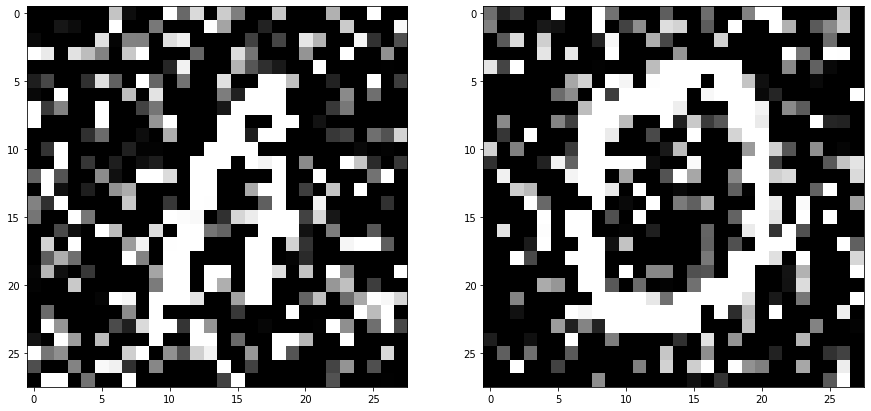

In [184]:
# your code here
kmnist_train = pd.read_csv(DATA_ROOT + "kmnist_train.csv")
kmnist_test = pd.read_csv(DATA_ROOT + "kmnist_test.csv")

kmnist_x_train = kmnist_train.drop("output", axis=1)
kmnist_y_train = kmnist_train["output"]

# Setting all values to be between 0 and 1
kmnist_x_train, kmnist_test = kmnist_x_train / 255.0, kmnist_test / 255.0

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15,15))

# Choosing for i in range, since we know there's one 1 and one 0 in this range
for i in range(1,3):
    row = kmnist_x_train.iloc[i]
    image_array = row.values.reshape(28,28)
    axs[i-1].imshow(image_array, cmap='Greys_r')

In [54]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [55]:
reg = tf.keras.regularizers.l2(l=0.0001)

model_kaggle = tf.keras.Sequential()
model_kaggle.add(tf.keras.layers.Flatten(input_shape=(784,)))
model_kaggle.add(tf.keras.layers.Dense(100, activation='relu'))
model_kaggle.add(tf.keras.layers.Dense(100, activation='relu'))
model_kaggle.add(tf.keras.layers.Dense(100, activation='relu'))
model_kaggle.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [56]:
# Loss function (which must be unchanged) and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_kaggle.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [57]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=20) 

kaggle_history = model_kaggle.fit(kmnist_x_train.values, kmnist_y_train.values, batch_size = 4, validation_split=0.3, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
210/210 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.7286 - val_loss: 0.2069 - val_accuracy: 0.9444
Epoch 2/1000
210/210 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9155 - val_loss: 0.1374 - val_accuracy: 0.9528
Epoch 3/1000
210/210 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9357 - val_loss: 0.1239 - val_accuracy: 0.9556
Epoch 4/1000
210/210 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9714 - val_loss: 0.1825 - val_accuracy: 0.9278
Epoch 5/1000
210/210 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9583 - val_loss: 0.1291 - val_accuracy: 0.9611
Epoch 6/1000
210/210 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9738 - val_loss: 0.1336 - val_accuracy: 0.9583
Epoch 7/1000
210/210 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9726 - val_loss: 0.1681 - val_accuracy:

Text(0.5, 0.98, 'MLP Training')

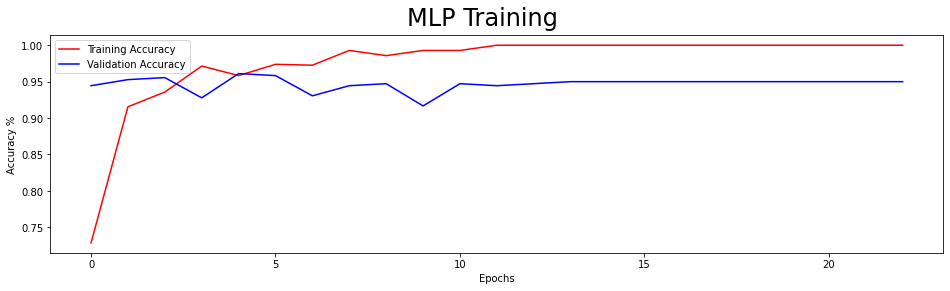

In [58]:
# Plotting training and validation accuracy
fig, ax = plt.subplots(figsize = (16,4))
ax.plot(kaggle_history.history['accuracy'],'r',label = 'Training Accuracy')
ax.plot(kaggle_history.history['val_accuracy'],'b',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy %');
fig.suptitle('MLP Training', fontsize = 24)

In [61]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

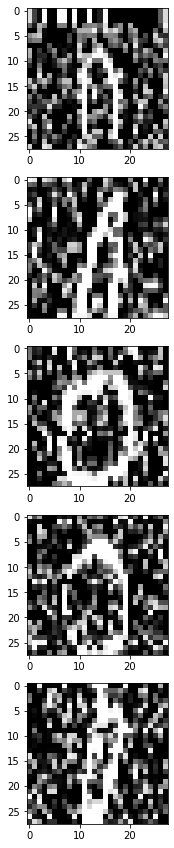

In [204]:
kmnist_x_train.values

fig, axs = plt.subplots(5, 1, figsize=(15,15))

kmnist_x_train_new = kmnist_x_train

new_list = []

for i in range(kmnist_x_train.shape[0]):
  rot_num = np.random.uniform(low=-45.0, high=45.0, size=(1,))[0]
  x_shift = np.random.uniform(low=-5.0, high=5.0, size=(1,))[0]
  y_shift = np.random.uniform(low=-5.0, high=5.0, size=(1,))[0]
  x_zoom = np.random.uniform(low=.9, high=1.1, size=(1,))[0]
  y_zoom = np.random.uniform(low=.9, high=1.1, size=(1,))[0]
  data = kmnist_x_train.values[i].reshape(28,28)
  data_batch = (np.expand_dims(data,0))
  #x_input = array_to_img(data_batch, data_format="channels_first")
  #axs[i-1].imshow(x_input, cmap='Greys_r')
  new_image = ImageDataGenerator().apply_transform(x=data_batch, transform_parameters=
                              {'theta': rot_num,
                               'tx': x_shift,
                               'ty': y_shift, 
                               'zx': x_zoom,
                               'zy': y_zoom})
  x_input = array_to_img(new_image, data_format="channels_first")
  if i < 5:
    axs[i].imshow(x_input, cmap='Greys_r')
  reshaped = new_image.reshape(784,)
  #print(kmnist_x_train_new.shape)
  new_list.append(reshaped)
  kmnist_x_train_new.append(pd.Series(reshaped), ignore_index=True)
  #np.vstack((kmnist_x_train_new.values, reshaped))

In [193]:
#kmnist_x_train_new.shape

new_list_array = np.array(new_list)

kmnist_augmented = np.vstack((kmnist_x_train_new, new_list_array))

kmnist_y_train_new = np.hstack((kmnist_y_train, kmnist_y_train))

In [195]:
kmnist_y_train_new.shape

(2400,)

In [196]:
reg = tf.keras.regularizers.l2(l=0.0001)

model_aug = tf.keras.Sequential()
model_aug.add(tf.keras.layers.Flatten(input_shape=(784,)))
model_aug.add(tf.keras.layers.Dense(100, activation='relu'))
model_aug.add(tf.keras.layers.Dense(100, activation='relu'))
model_aug.add(tf.keras.layers.Dense(100, activation='relu'))
model_aug.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [197]:
# Loss function (which must be unchanged) and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_aug.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [201]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=20) 

aug_history = model_aug.fit(kmnist_augmented, kmnist_y_train_new, batch_size = 4, validation_split=0.3, epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
420/420 [==============================] - 1s 2ms/step - loss: 0.3075 - accuracy: 0.8810 - val_loss: 0.1116 - val_accuracy: 0.9639
Epoch 2/1000
420/420 [==============================] - 1s 2ms/step - loss: 0.2298 - accuracy: 0.9131 - val_loss: 0.1455 - val_accuracy: 0.9361
Epoch 3/1000
420/420 [==============================] - 1s 2ms/step - loss: 0.1856 - accuracy: 0.9339 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 4/1000
420/420 [==============================] - 1s 2ms/step - loss: 0.1556 - accuracy: 0.9387 - val_loss: 0.0620 - val_accuracy: 0.9889
Epoch 5/1000
420/420 [==============================] - 1s 2ms/step - loss: 0.1329 - accuracy: 0.9554 - val_loss: 0.0552 - val_accuracy: 0.9861
Epoch 6/1000
420/420 [==============================] - 1s 2ms/step - loss: 0.1093 - accuracy: 0.9583 - val_loss: 0.3277 - val_accuracy: 0.8222
Epoch 7/1000
420/420 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9560 - val_loss: 0.0162 - val_accuracy:

In [202]:
# your code here 
# THIS WILL NOT CHANGE
predictions = model_aug.predict_classes(kmnist_test.values).flatten()

predictions.shape

data = {'id': kmnist_test.index, 'category': predictions}

predictions_df = pd.DataFrame(data)

In [203]:
predictions_df.to_csv(DATA_ROOT + "skimble_predictions4.csv", index=False)